In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 

from astropy.table import Table

#import desispec.io
#from desitarget.sv3 import sv3_targetmask 
import astropy

from astropy.cosmology import Planck18 as cosmo

import glob

In [2]:
# The link between rosette and TILEID is here https://desi.lbl.gov/trac/wiki/SurveyOps/OnePercent#Rosettefootprints

In [3]:
# here is the file from the LSS catalog
#lss_data = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_full.dat.fits')
lss_data = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_N_clustering.dat.fits')

target_data = Table.read('/global/cfs/cdirs/desi/spectro/redux/fuji/zcatalog/ztile-sv3-bright-cumulative.fits')

(array([4.00000e+00, 5.30000e+01, 6.86000e+02, 2.81000e+03, 6.32300e+03,
        1.12590e+04, 1.77080e+04, 2.75290e+04, 4.04880e+04, 5.19650e+04,
        7.82708e+05, 4.48520e+04, 3.22430e+04, 2.06590e+04, 1.30200e+04,
        7.78800e+03, 3.91800e+03, 1.28900e+03, 1.80000e+02, 1.80000e+01]),
 array([-0.9652476 , -0.8703938 , -0.77554005, -0.6806863 , -0.58583254,
        -0.49097878, -0.39612505, -0.3012713 , -0.20641753, -0.11156377,
        -0.01671001,  0.07814375,  0.1729975 ,  0.26785126,  0.36270502,
         0.45755875,  0.5524125 ,  0.64726627,  0.74212   ,  0.8369738 ,
         0.93182755], dtype=float32),
 <BarContainer object of 20 artists>)

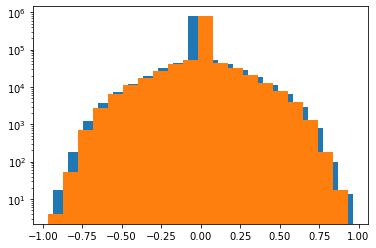

In [4]:
plt.hist(target_data['SHAPE_E1'], log=True, bins=20)
plt.hist(target_data['SHAPE_E2'], log=True, bins=20)

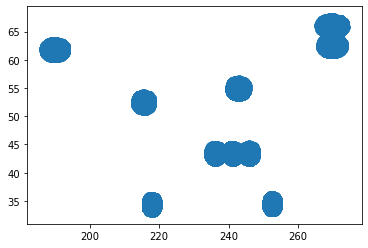

In [5]:
plt.scatter(lss_data['RA'], lss_data['DEC'])

In [6]:
list_rosette = np.array(list(set(lss_data['rosette_number'])), dtype='int')

In [7]:
list_rosette

array([ 3,  6,  7, 11, 12, 13, 14, 15, 18, 19])

2616 3


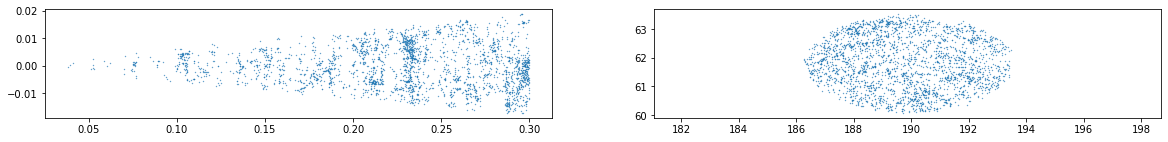

2149 6


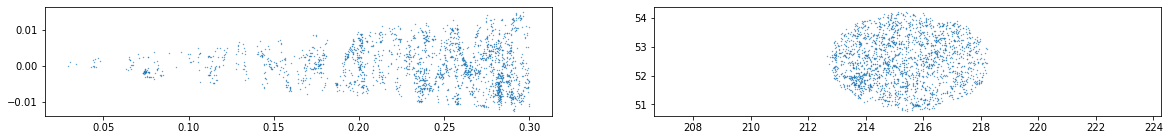

2314 7


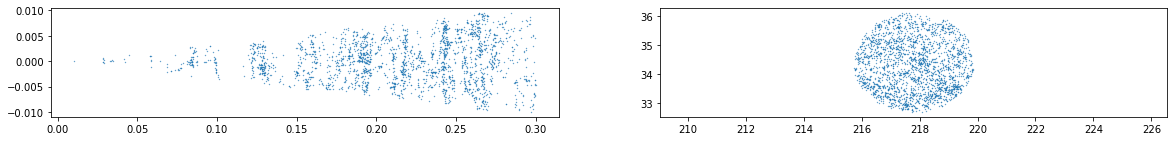

3237 11


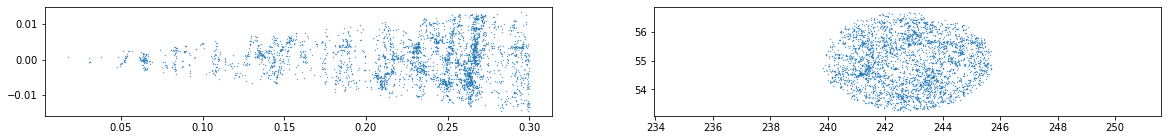

2506 12


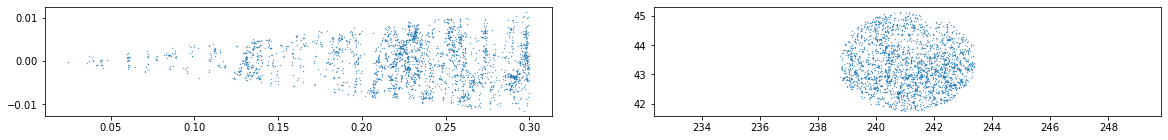

3565 13


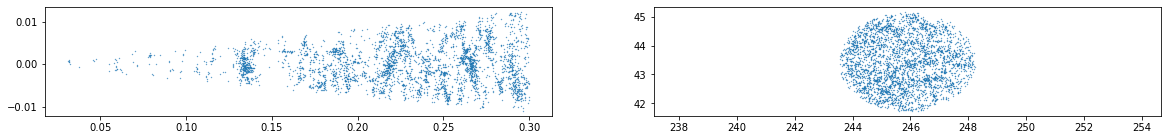

2073 14


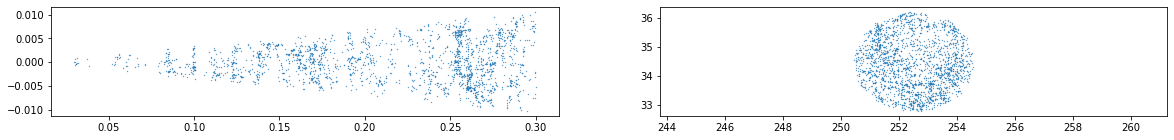

2151 15


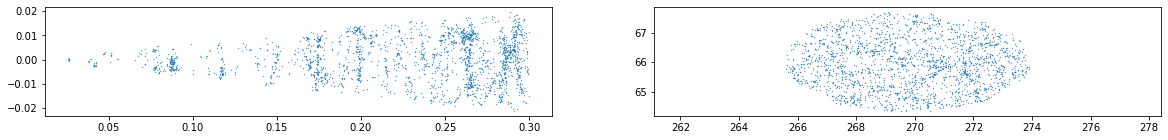

2188 18


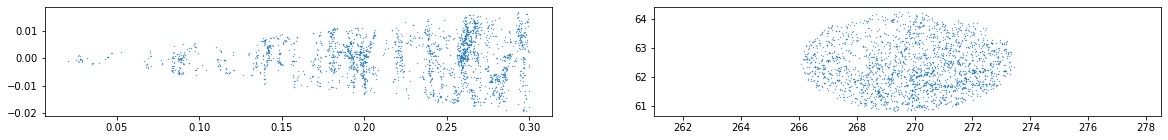

2266 19


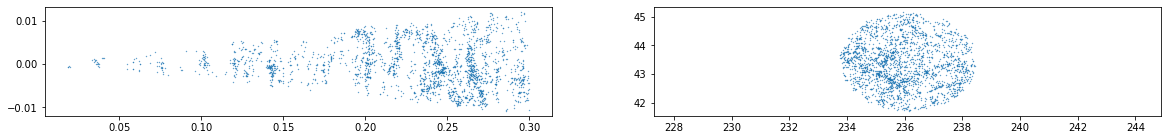

In [8]:
# Full description for the rosette footprints.
#https://desi.lbl.gov/trac/wiki/SurveyOps/OnePercent#Rosettefootprints
for rosette_id in list_rosette:
    ii = (lss_data['rosette_number']==rosette_id) & (lss_data['Z']<0.3) & (lss_data['ABSMAG_R']<-20.1826)
    data_rosette = lss_data[ii] 
    print(len(data_rosette), rosette_id)
    plt.figure(figsize=(20,2))
    #plt.subplot(1,2,1)
    #plt.scatter(data_rosette['RA'], data_rosette['DEC'], alpha=0.1)
    #plt.subplot(1,2,2, adjustable='box')

    plt.subplot(1,2,1)
    plt.scatter(data_rosette['Z'], 
                data_rosette['Z']*np.deg2rad(data_rosette['RA']-np.mean(data_rosette['RA'])), s=0.1)
    plt.subplot(1,2,2)
    plt.scatter(data_rosette['RA'], data_rosette['DEC'], s=0.1)
    plt.axis('equal')
    plt.show()

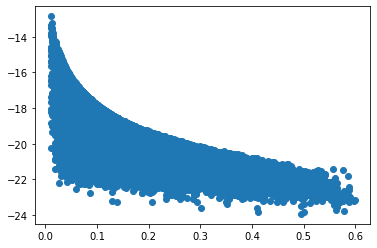

In [9]:
plt.scatter(lss_data['Z'], lss_data['ABSMAG_R'])

In [10]:
z_max_list = [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

for z_max in z_max_list:
    ii = lss_data['Z']>z_max
    absmag_r_max = np.max(lss_data['ABSMAG_R'][ii])
    n_in_vol = np.count_nonzero((lss_data['Z']<=z_max) & (lss_data['ABSMAG_R']<absmag_r_max))
    print(z_max, absmag_r_max, n_in_vol)


0.1 -17.82851513520599 6348
0.2 -19.300668796745292 18265
0.25 -19.789899469823162 22463
0.3 -20.182618967034653 25065
0.35 -20.5119326826208 22766
0.4 -20.796349674149578 18972
0.5 -21.42129109990171 8348


In [11]:
# read some random
random  = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_N_0_clustering.ran.fits')

In [12]:
random

TARGETID,RA,DEC,NTILE,TILES,rosette_number,rosette_r,COMP_TILE,Z,WEIGHT,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP
int64,float64,float64,int64,bytes43,int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
327863312287006861,217.053993747975,32.844339582840995,2,208-211,7,1.6750873838143794,1.0,0.18115679145762623,1.015748031496063,6.6309824,18.932077,35.924744,29.712479,19.276299,0.913697512951229,0.0012333256040872181,0.22658534268215497,0.2280468116260682,0.6059796980666337,0.7611166435887314,-0.17572208771389744,-0.17572208771389744,-19.45675412078314,0.012707690463455164,0.01149153305805754
327863312287006871,216.96105123277434,32.85843363693025,1,205,7,1.6924289577861624,0.36363636363636365,0.3624525260132444,1.0,3.9206953,16.545471,47.05639,96.634056,70.364136,0.8868703457149468,0.2667498075435105,0.9431691041625481,0.4940502618053929,1.3128088477039455,0.7445310564354318,-0.3515789502328471,-0.3515789502328471,-21.111559805379656,0.0013972681760458132,0.09561734123289738
327863312287006915,217.05116530360402,32.847663141703265,2,208-211,7,1.6728731797200223,1.0,0.3009988823837262,1.0,4.7546234,18.697203,42.036736,61.6634,40.48283,0.9167673988193118,0.17254855948451037,0.742431627584144,0.3993063207665398,1.12294222251721,0.763014565168275,-0.2919689159122144,-0.2919689159122144,-20.742069887517225,0.003713248311710263,0.03826194249707034
327863312287006987,217.0442969494446,32.86749656185846,4,202-205-208-211,7,1.6566218761348026,1.0,0.269749437606277,1.0,11.32772,27.69174,49.815468,60.47266,46.467403,0.6156013150497894,-0.002619240838966419,0.35229755629386134,0.2150089861993652,0.622131157387025,0.5633959409949574,-0.2616569544780887,-0.2616569544780887,-20.75094989331964,0.008313487102263754,0.017459485623234086
327863312287007608,217.05123979169434,32.85948789907687,3,205-208-211,7,1.6618672119726665,0.875,0.38642550584480345,1.0,5.126405,15.922154,32.868187,47.95785,36.34013,0.6500899520510693,0.1312660664496864,0.7116486790958827,0.3512462419400154,0.9942614139904594,0.5874573926468216,-0.3748327406694593,-0.3748327406694593,-21.073914999577774,0.0009571040215082368,0.13371119385114222
327863312287007688,216.98216862256743,32.86499544647257,2,205-211,7,1.6792381694892633,0.96,0.05474407320670259,1.0,84.82311,145.53484,214.5928,157.55905,95.49745,0.6358525777185176,-0.14666822215333003,-0.19638875031130065,0.0723410373068668,0.08094858586080028,0.5775245010066135,-0.05310175101050151,-0.05310175101050151,-18.870597597337188,0.0504667514780847,0.0029186997834375608
327863312287007980,216.99280256908355,32.85273945429143,1,205,7,1.6869210666857204,0.36363636363636365,0.040109717978985916,1.0,160.24985,276.7486,411.52878,368.69748,244.49443,0.6545562614810303,-0.16498447526276305,-0.22632097966371512,0.05530027966193296,0.057946664521764224,0.5905733722202469,-0.03890642643961634,-0.03890642643961634,-18.86622219446828,0.08453159877481627,0.0017445635962380836
327863312287008123,217.0097205677191,32.830868129084884,1,211,7,1.701539079552833,0.45714285714285713,0.10301862103966075,1.0,82.64186,210.44333,395.66196,338.20026,216.05219,1.0070327040615938,-0.09922116303776386,-0.09141469473607652,0.13528614852658283,0.30710619737553724,0.8430191235143268,-0.09992806240847092,-0.09992806240847092,-20.71579813702413,0.020758901725607407,0.007066106315277897
327863312287008353,217.0434195828927,32.83808660534789,2,208-211,7,1.6841780523815808,1.0,0.14433940320340033,1.0,54.22743,100.89277,159.01653,125.48583,87.38373,0.601318276631374,-0.07434922848462558,-0.0015647219128746004,0.14209043688551184,0.26302957914539926,0.5531636409432376,-0.14000922110729833,-0.14000922110729833,-20.691949869379126,0.024799977701634248,0.005921525235303553


In [13]:
list_rosette_random = np.array(list(set(random['rosette_number'])), dtype='int')
print(list_rosette_random)

[ 3  6  7 11 12 13 14 15 18 19]


3 8021 215721


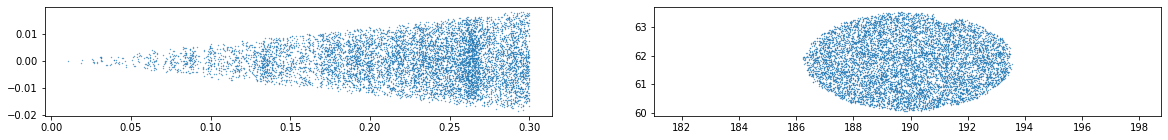

6 7873 215721


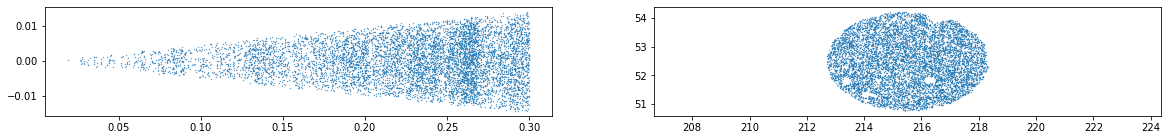

7 8074 215721


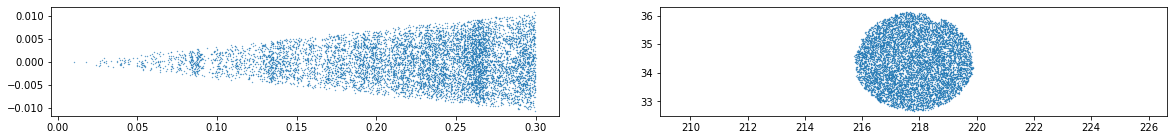

11 7919 215721


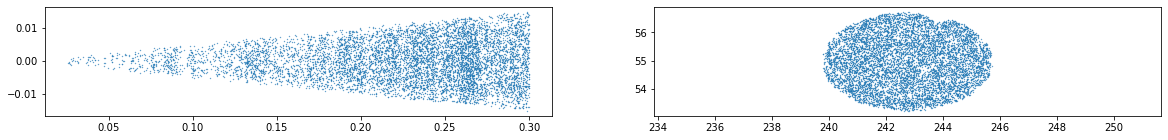

12 8013 215721


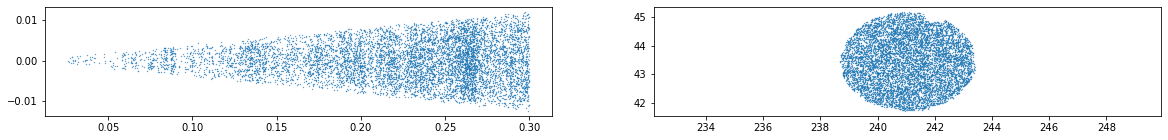

13 7894 215721


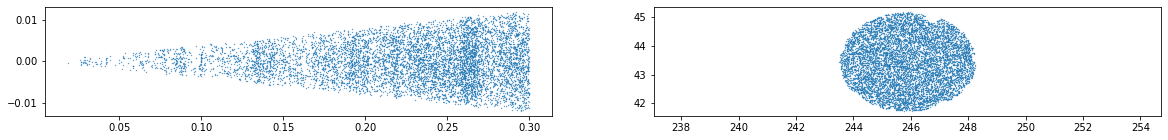

14 7794 215721


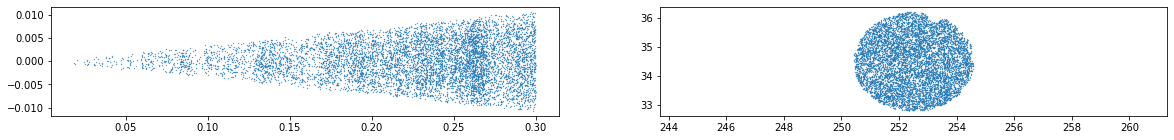

15 7744 215721


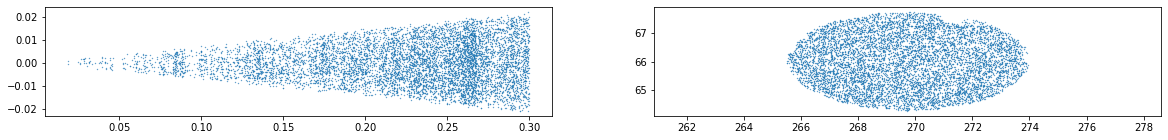

18 7820 215721


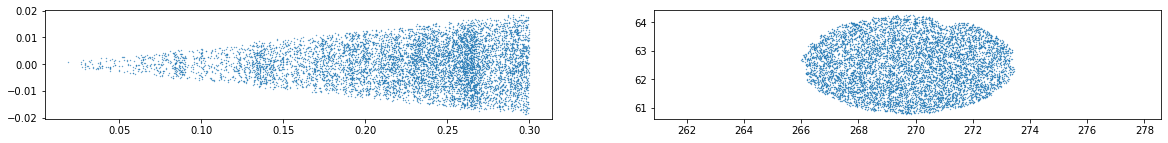

19 7960 215721


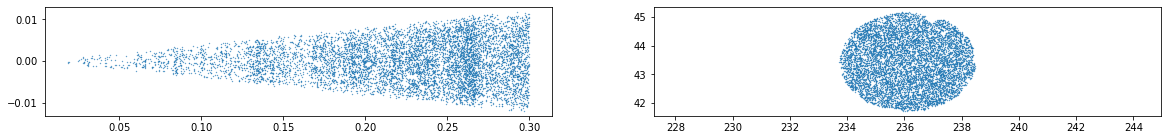

In [14]:
# Full description for the rosette footprints.
#https://desi.lbl.gov/trac/wiki/SurveyOps/OnePercent#Rosettefootprints
for rosette_id in list_rosette_random:
    ii = (random['rosette_number']==rosette_id) & (random['Z']<0.3) & (random['ABSMAG_R']<-20.1826)
    data_rosette = random[ii] 
    print(rosette_id, len(data_rosette), len(random))
    plt.figure(figsize=(20,2))
    plt.subplot(1,2,1)
    plt.scatter(data_rosette['Z'], 
                data_rosette['Z']*np.deg2rad(data_rosette['RA']-np.mean(data_rosette['RA'])), s=0.1)
    plt.subplot(1,2,2)
    plt.scatter(data_rosette['RA'], data_rosette['DEC'], s=0.1)
    plt.axis('equal')
    plt.show()

2616 8133
../data/radec_rosette_3_data.csv ../data/radec_rosette_3_random_9.csv
2149 8000
../data/radec_rosette_6_data.csv ../data/radec_rosette_6_random_9.csv
2314 8015
../data/radec_rosette_7_data.csv ../data/radec_rosette_7_random_9.csv
3237 7861
../data/radec_rosette_11_data.csv ../data/radec_rosette_11_random_9.csv
2506 7931
../data/radec_rosette_12_data.csv ../data/radec_rosette_12_random_9.csv
3565 7899
../data/radec_rosette_13_data.csv ../data/radec_rosette_13_random_9.csv
2073 7788
../data/radec_rosette_14_data.csv ../data/radec_rosette_14_random_9.csv
2151 7926
../data/radec_rosette_15_data.csv ../data/radec_rosette_15_random_9.csv
2188 7732
../data/radec_rosette_18_data.csv ../data/radec_rosette_18_random_9.csv
2266 8184
../data/radec_rosette_19_data.csv ../data/radec_rosette_19_random_9.csv


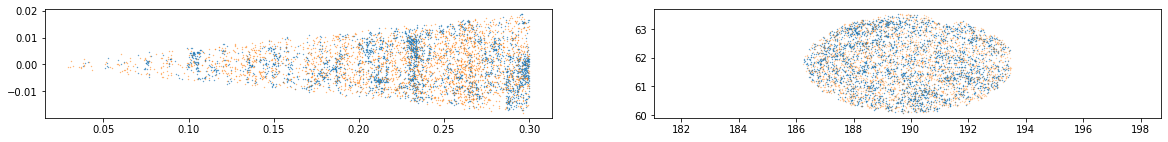

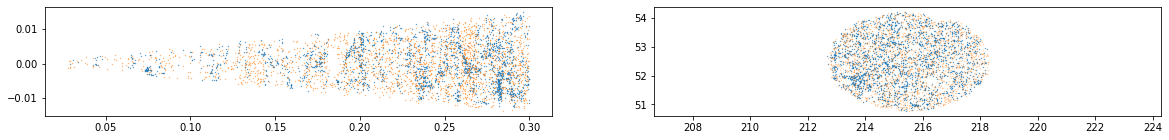

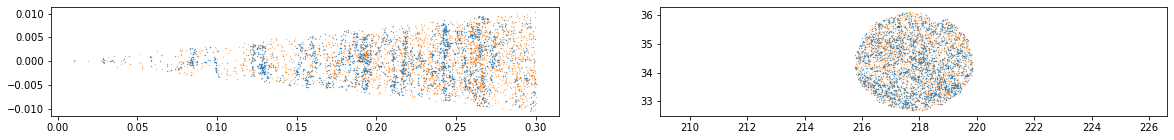

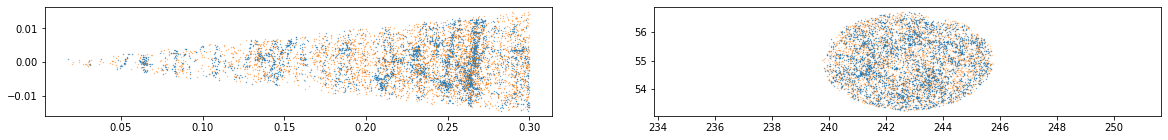

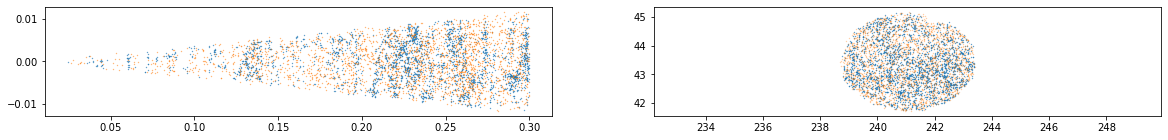

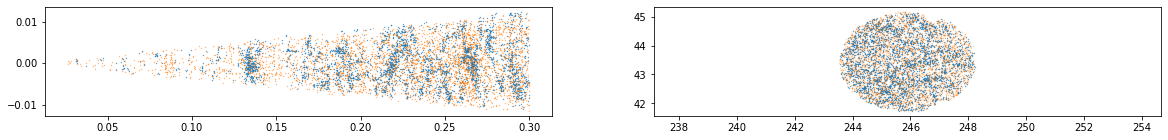

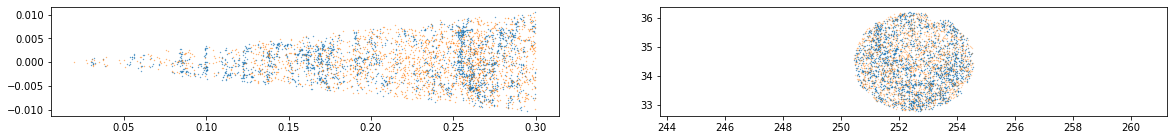

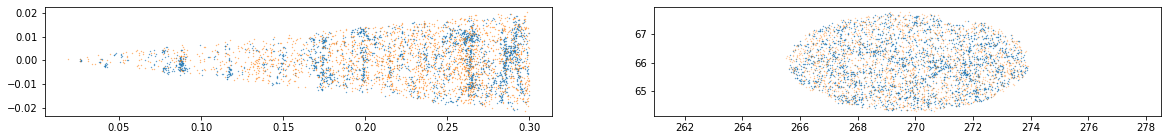

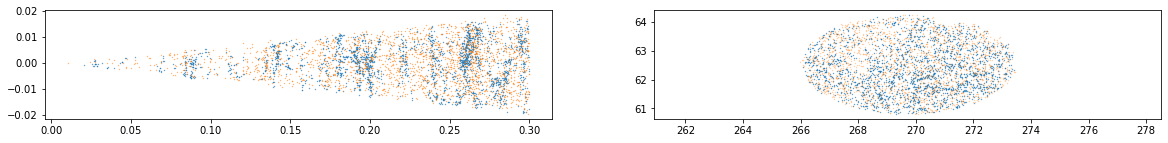

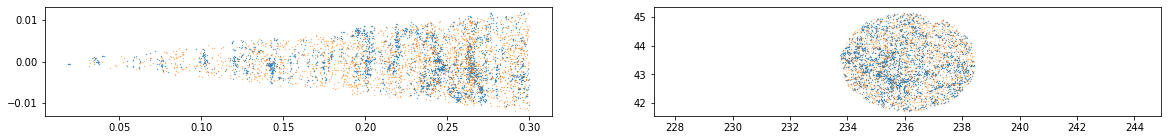

In [15]:
hemi = 'N'
rand_id = 9
lss_data = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_{}_clustering.dat.fits'.format(hemi))
random  = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_{}_{}_clustering.ran.fits'.format(hemi, rand_id))
max_z = 0.3
max_magabs_r = -20.1826
list_rosette = np.array(list(set(lss_data['rosette_number'])), dtype='int')
for rosette_id in list_rosette:
    
    ii = (lss_data['rosette_number']==rosette_id) & (lss_data['Z']<0.3) & (lss_data['ABSMAG_R']<-20.1826)
    data_rosette = lss_data[ii] 
    n_data = len(data_rosette)
    
    ii = (random['rosette_number']==rosette_id) & (random['Z']<0.3) & (random['ABSMAG_R']<-20.1826)
    random_rosette = random[ii]
    n_random = len(random_rosette)
    random_ids = np.arange(n_random)
    select_random_ids = np.random.choice(random_ids, n_data, replace=False)
    random_rosette = random_rosette[select_random_ids]
    
    print(n_data, n_random)

    
    plt.figure(figsize=(20,2))
    plt.subplot(1,2,1)
    plt.scatter(data_rosette['Z'], 
                data_rosette['Z']*np.deg2rad(data_rosette['RA']-np.mean(data_rosette['RA'])), s=0.1)
    plt.scatter(random_rosette['Z'], 
                random_rosette['Z']*np.deg2rad(random_rosette['RA']-np.mean(random_rosette['RA'])), s=0.1, alpha=0.8)    
    plt.subplot(1,2,2)
    plt.scatter(data_rosette['RA'], data_rosette['DEC'], s=0.1)
    plt.scatter(random_rosette['RA'], random_rosette['DEC'], s=0.1, alpha=0.5)
    plt.axis('equal')
    
    file_data = '../data/radec_rosette_{}_data.csv'.format(rosette_id)
    file_random = '../data/radec_rosette_{}_random_{}.csv'.format(rosette_id, rand_id)
    print(file_data, file_random)
    
    astropy.io.ascii.write(random_rosette[['RA', 'DEC', 'Z', 'TARGETID']], file_random, format='csv', overwrite=True)
    astropy.io.ascii.write(data_rosette[['RA', 'DEC', 'Z', 'TARGETID']], file_data, format='csv', overwrite=True)


In [21]:
random

TARGETID,RA,DEC,NTILE,TILES,rosette_number,rosette_r,COMP_TILE,Z,WEIGHT,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP
int64,float64,float64,int64,bytes43,int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
327863312287007705,216.92288898970372,32.86092769651155,1,205,7,1.7035295361979614,0.36363636363636365,0.22405780650284332,1.0,17.042772,35.545856,56.836308,58.43199,48.020584,0.5573704065482311,-0.050263736142373686,0.19048826331525376,0.15872265299152766,0.4398997903432772,0.5169452686541098,-0.217336072307758,-0.217336072307758,-20.562353340132038,0.009219810701767882,0.015770253951760238
327863312287008030,216.94297486781045,32.8423496042148,1,205,7,1.7133324816067441,0.36363636363636365,0.25643840133153023,1.0,8.393873,20.342003,38.033234,58.77207,61.379425,0.6311294752302369,-0.00445468607821628,0.325494482490375,0.21423248197588862,0.6010817593993834,0.5742293663753334,-0.2487452492915843,-0.2487452492915843,-20.302036650726627,0.008313487102263754,0.017459485623234086
327863312287008182,216.97784989582914,32.8671977925694,2,205-211,7,1.6786845604611598,0.96,0.25444769187754807,1.0,10.092639,32.21485,65.93459,90.00664,69.845764,0.8484490285239269,0.07802580852563298,0.4897048012419403,0.306023688685763,0.8453741903140285,0.7207775196119689,-0.24681426112122162,-0.24681426112122162,-20.866382198106162,0.008313487102263754,0.017459485623234086
327863312287008299,216.93578915589777,32.86456925680604,1,205,7,1.6956487255689112,0.36363636363636365,0.12222262967358781,1.0,15.254274,25.237076,33.38142,21.585049,15.433281,0.5152181325336193,-0.09316389947812882,-0.06176261672854486,0.10867373496932135,0.17308646506574413,0.48220668518678034,-0.11855595078338017,-0.11855595078338017,-18.798669260542688,0.020644622490123412,0.007104943156241312
327863312287008332,216.95534441845402,32.85965720476695,1,205,7,1.693280262255346,0.36363636363636365,0.26710316455711075,1.0,6.00074,18.254332,35.800056,39.624416,25.966465,0.7914247698404178,0.07267579725350665,0.4891539357382842,0.3017087849461693,0.8240887647952251,0.6855229284761395,-0.25909006962039743,-0.25909006962039743,-20.35194218417534,0.008313487102263754,0.017459485623234086
327863312287008477,216.97857137352918,32.85306440201647,1,205,7,1.6913789202802303,0.36363636363636365,0.3510924122925369,1.0,5.1412506,23.146,51.64276,69.990814,45.73271,0.9487981816106268,0.2791940910883564,0.9639141284718704,0.5073511752142543,1.3529465007659505,0.7879228934424445,-0.3405596399237608,-0.3405596399237608,-21.418876498429434,0.0013972681760458132,0.09561734123289738
327863312287008831,216.96109181809823,32.867620050044664,1,205,7,1.6840364623184858,0.36363636363636365,0.12018079204294287,1.0,62.229267,167.25134,322.81857,287.98904,184.42535,1.0188988977173787,-0.0745194070418327,-0.01998156769866441,0.1612818625627187,0.3804727585500012,0.8542458410732644,-0.11657536828165457,-0.11657536828165457,-20.833201147443138,0.020644622490123412,0.007104943156241312
327863312287009008,217.01229785818998,32.87123977005091,2,205-211,7,1.6634752185099277,0.96,0.21368748600444634,1.0,33.550156,121.65525,257.6226,294.35825,205.59001,1.0529689477192588,0.06853521949734742,0.41415826701734654,0.30805168341011047,0.8201638424395483,0.88647983620982,-0.20727686142431295,-0.20727686142431295,-21.911585068782138,0.009219810701767882,0.015770253951760238
327863312287009067,216.99387377182626,32.85128869820281,1,205,7,1.6878991731880024,0.36363636363636365,0.1866497339500575,1.0,13.711536,39.248302,77.340324,86.72991,62.742397,0.9033659924197829,0.006665799477018175,0.24513597343907123,0.2336668238374451,0.6207736902025038,0.7547293000167772,-0.18105024193155575,-0.18105024193155575,-20.320267914742,0.012707690463455164,0.01149153305805754


In [22]:

def write_data_random(target_data, hemi='N', rand_id=0):
    lss_data = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_{}_clustering.dat.fits'.format(hemi))
    random  = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_{}_{}_clustering.ran.fits'.format(hemi, rand_id))
    max_z = 0.3
    max_magabs_r = -20.1826
    list_rosette = np.array(list(set(lss_data['rosette_number'])), dtype='int')
    

    
    for rosette_id in list_rosette:
    
        ii = (lss_data['rosette_number']==rosette_id) & (lss_data['Z']<0.3) & (lss_data['ABSMAG_R']<-20.1826)
        data_rosette = lss_data[ii] 
        n_data = len(data_rosette)
        data_id = data_rosette['TARGETID']
        shape_e1 = []
        shape_e2 = []
        for point_id in data_id:
            ii = target_data['TARGETID']==point_id
            point = target_data[ii]
            shape_e1.append(point['SHAPE_E1'][0])
            shape_e2.append(point['SHAPE_E2'][0])
        shape_e1 = np.array(shape_e1)
        #print('s', shape_e1)
        #print('asfd', point_id, point)
        data_rosette['SHAPE_E1'] = shape_e1
        data_rosette['SHAPE_E2'] = shape_e2
        #print(data_rosette)
    
        ii = (random['rosette_number']==rosette_id) & (random['Z']<0.3) & (random['ABSMAG_R']<-20.1826)
        random_rosette = random[ii]
        n_random = len(random_rosette)
        random_ids = np.arange(n_random)
        select_random_ids = np.random.choice(random_ids, n_data, replace=False)
        random_rosette = random_rosette[select_random_ids]
    
        #print(n_data, n_random)

    
        file_data = '../data/radec_rosette_{}_data.csv'.format(rosette_id)
        file_random = '../data/radec_rosette_{}_random_{}.csv'.format(rosette_id, rand_id)
        #print(file_data, file_random)
    
        astropy.io.ascii.write(random_rosette[['RA', 'DEC', 'Z', 'TARGETID','ABSMAG_R', 'REST_GMR_0P1', 'REST_GMR_0P0']], file_random, format='csv', overwrite=True)
        astropy.io.ascii.write(data_rosette[['RA', 'DEC', 'Z', 'TARGETID', 'ABSMAG_R', 'SHAPE_E1', 'SHAPE_E2', 'REST_GMR_0P1', 'REST_GMR_0P0']], file_data, format='csv', overwrite=True)


In [23]:
def convert_radecz_to_xyz(file_in):
    file_out = file_in.replace('radec_', 'xyz_')
    data_in = Table.read(file_in)
    data_in['R'] = np.array(cosmo.comoving_distance(data_in['Z']))
    
    x, y, z = astropy.coordinates.spherical_to_cartesian(data_in['R'], np.array(np.deg2rad(data_in['DEC'])), np.array(np.deg2rad(data_in['RA'])))
    data_in['X'] = x
    data_in['Y'] = y
    data_in['Z'] = z
    #print(file_out)
    #print(data_in)
    #plt.scatter(x,y, s=0.1)
    astropy.io.ascii.write(data_in[['X', 'Y', 'Z', 'TARGETID']], file_out, format='csv', overwrite=True)

In [24]:
target_data = Table.read('/global/cfs/cdirs/desi/spectro/redux/fuji/zcatalog/ztile-sv3-bright-cumulative.fits')

for i in range(15):
    print(i)
    write_data_random(target_data, hemi='N', rand_id=i)
    write_data_random(target_data, hemi='S', rand_id=i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [25]:
files = glob.glob("../data/radec_*")
for file in files:
    convert_radecz_to_xyz(file)